In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../../data/processed/match_details.csv')
print(df.head())

         match_id  game_creation  game_duration game_mode     game_type  \
0  NA1_4998871315  1715847289856           1665   CLASSIC  MATCHED_GAME   
1  NA1_4998871315  1715847289856           1665   CLASSIC  MATCHED_GAME   
2  NA1_4998871315  1715847289856           1665   CLASSIC  MATCHED_GAME   
3  NA1_4998871315  1715847289856           1665   CLASSIC  MATCHED_GAME   
4  NA1_4998871315  1715847289856           1665   CLASSIC  MATCHED_GAME   

     game_version  map_id  participant_id  \
0  14.10.584.5961      11               1   
1  14.10.584.5961      11               2   
2  14.10.584.5961      11               3   
3  14.10.584.5961      11               4   
4  14.10.584.5961      11               5   

                                         summoner_id  \
0  2L5Pg_5bWVXlCPgz2Ibnug53iy-hR4da7bwWSPoXXnvQT2...   
1   bFLwzgKVpvm0X3oEx2hC8RJnaHYN6JxwhHed6ZHvlw12hNE6   
2    E3eFh1D7cTJVMOzmFvF7o8XZWx-96a8TOA8obPhS0hL4S4o   
3   S1Tq4jLLhrJQSBIYlTBc5_K_DscqdQ73iQWbvso3ulvqaOu9  

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332388 entries, 0 to 1332387
Data columns (total 30 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   match_id              1332388 non-null  object 
 1   game_creation         1332388 non-null  int64  
 2   game_duration         1332388 non-null  int64  
 3   game_mode             1332388 non-null  object 
 4   game_type             1332388 non-null  object 
 5   game_version          1332388 non-null  object 
 6   map_id                1332388 non-null  int64  
 7   participant_id        1332388 non-null  int64  
 8   summoner_id           1332388 non-null  object 
 9   puuid                 1332388 non-null  object 
 10  champion_id           1332388 non-null  int64  
 11  spell1_id             0 non-null        float64
 12  spell2_id             0 non-null        float64
 13  item0                 1332388 non-null  int64  
 14  item1                 1332388 non-

In [18]:
print(df.isnull().sum())

match_id                      0
game_creation                 0
game_duration                 0
game_mode                     0
game_type                     0
game_version                  0
map_id                        0
participant_id                0
summoner_id                   0
puuid                         0
champion_id                   0
spell1_id               1332388
spell2_id               1332388
item0                         0
item1                         0
item2                         0
item3                         0
item4                         0
item5                         0
item6                         0
kills                         0
deaths                        0
assists                       0
total_damage_dealt            0
total_damage_taken            0
gold_earned                   0
vision_score                  0
total_minions_killed          0
team_position            305937
win                           0
dtype: int64


In [19]:
df['game_mode'].value_counts()

game_mode
CLASSIC       1025690
ARAM           172720
CHERRY         110576
STRAWBERRY      17172
URF              3750
ONEFORALL        1690
NEXUSBLITZ        790
Name: count, dtype: int64

In [20]:
# Calculate mean and median for relevant metrics by game mode
metrics = ['kills', 'deaths', 'assists', 'gold_earned']
mode_metrics = df.groupby('game_mode')[metrics].agg(['mean', 'median']).reset_index()
print(mode_metrics)

    game_mode      kills            deaths           assists         \
                    mean median       mean median       mean median   
0        ARAM  10.435624    9.0  10.462419   10.0  24.458997   24.0   
1      CHERRY   6.341539    6.0   6.476197    6.0   6.010590    5.0   
2     CLASSIC   5.852556    5.0   5.872958    6.0   7.594953    7.0   
3  NEXUSBLITZ   6.373418    5.0   6.368354    6.0  12.377215   12.0   
4   ONEFORALL   6.310651    5.0   6.333136    6.0   7.713018    7.0   
5  STRAWBERRY   0.000000    0.0   2.020731    1.0   0.000000    0.0   
6         URF   7.673867    7.0   7.693600    8.0   8.583200    8.0   

    gold_earned           
           mean   median  
0  13649.795310  13398.0  
1  11674.392752  10750.0  
2  11066.833503  10975.0  
3  12684.608861  12807.0  
4  13491.865089  13012.5  
5   2222.026613   1199.0  
6  14158.533867  14014.0  


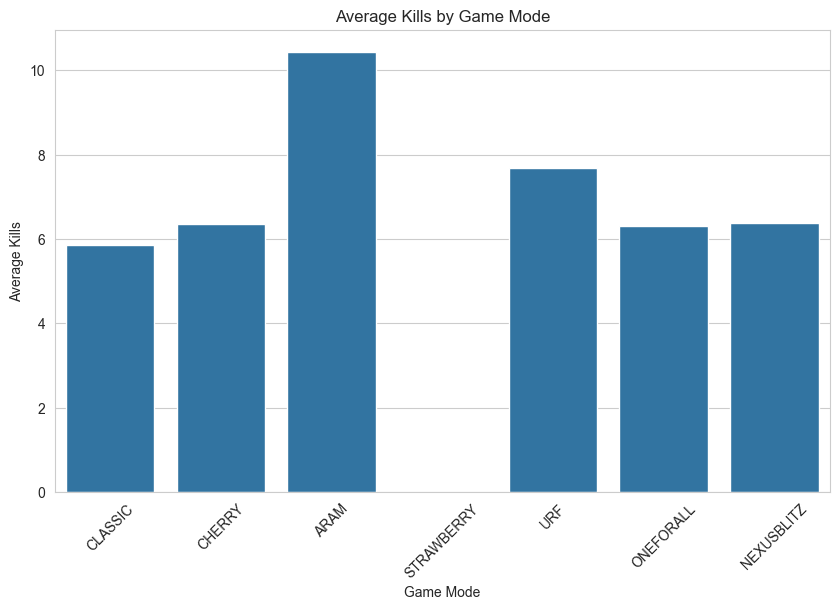

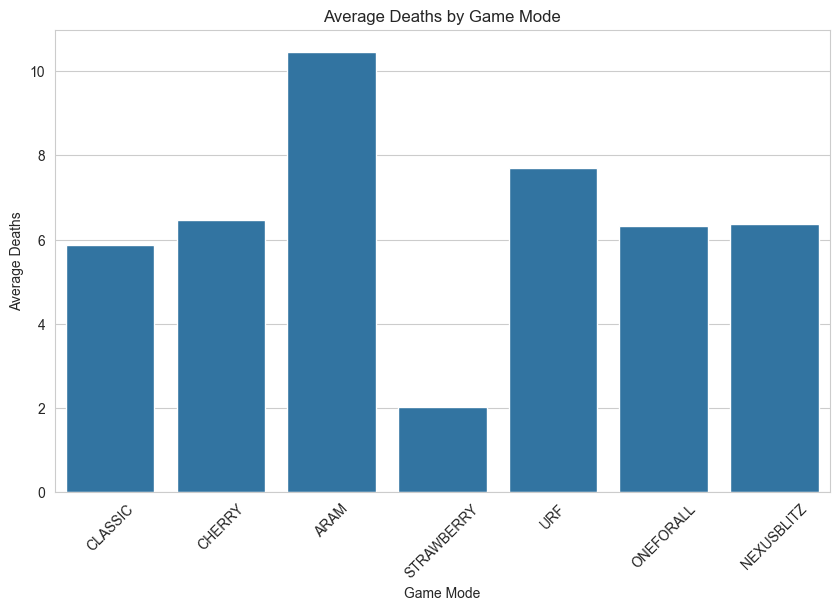

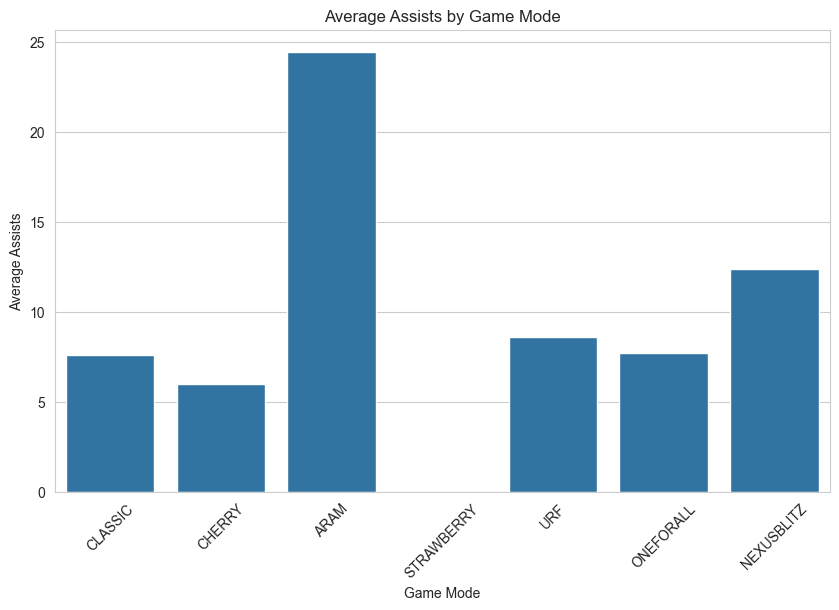

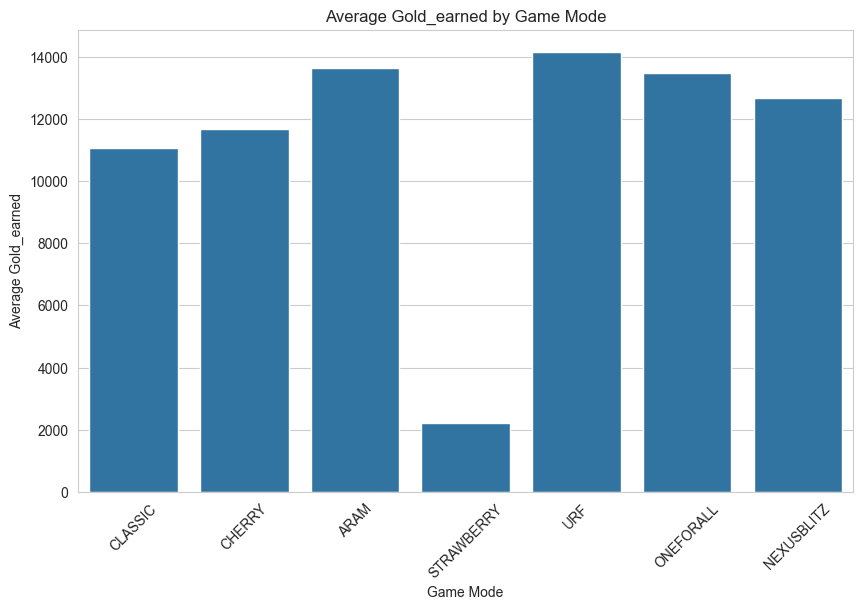

In [21]:


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='game_mode', y=f'{metric}', data=df, estimator=np.mean, errorbar=None)
    plt.title(f'Average {metric.capitalize()} by Game Mode')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xlabel('Game Mode')
    plt.xticks(rotation=45)
    plt.show()